In [ ]:
For this week’s assignment we're going to use Dodgers Major League Baseball data from 2012. The data file you will be using 
is contained in the dodgers.csv file. I would like you to determine what night would be the best to run a marketing 
promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend 
a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish 
this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process 
and how you used various techniques to come up with your recommendation. From this data, at a minimum, 
you should be able to demonstrate the following:

In [ ]:
My first thought when I viewed the information was to see if the temperature effected the attendance rate at all. 
I started off by running a box plot to view the attendance by dayt of the week and then ran a scatter plot to see the 
correlation between attendance and temperate.

In [ ]:
At the conclusion of the assignment the predictive boxplot shows that the best day to run advertisements would be on Tuesdays, 
Thursdays and Sundays. 

In [161]:
##View os and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
print (os)

SyntaxError: invalid syntax (Temp/ipykernel_21940/3770162991.py, line 8)

In [17]:
##Read in spreadsheet and view info
dodgers_df = pd.read_csv("dodgers.csv")
dodgers_df.head(10)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


In [19]:
## View data by day_of_week
## Shows Thursday as an outlier 
dodgers_df['day_of_week'].value_counts(dropna = False)

Tuesday      13
Friday       13
Saturday     13
Sunday       13
Wednesday    12
Monday       12
Thursday      5
Name: day_of_week, dtype: int64

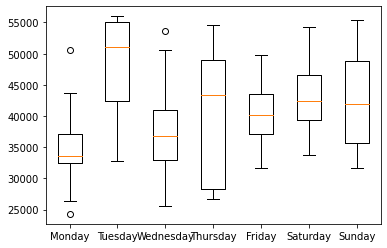

In [22]:
##Set up box plot to show distribution for attendance on different days of the week
Monday = dodgers_df.loc[dodgers_df['day_of_week']=='Monday', 'attend'].values
Tuesday = dodgers_df.loc[dodgers_df['day_of_week']=='Tuesday', 'attend'].values
Wednesday = dodgers_df.loc[dodgers_df['day_of_week']=='Wednesday', 'attend'].values
Thursday = dodgers_df.loc[dodgers_df['day_of_week']=='Thursday', 'attend'].values
Friday = dodgers_df.loc[dodgers_df['day_of_week']=='Friday', 'attend'].values
Saturday = dodgers_df.loc[dodgers_df['day_of_week']=='Saturday', 'attend'].values
Sunday = dodgers_df.loc[dodgers_df['day_of_week']=='Sunday', 'attend'].values

plt.boxplot([Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday], labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

In [18]:
## order by day of week

df_weekday = df.groupby(['day_of_week']).median()

In [16]:
## view median data for attendance - temp and day will be skewed data figures

print (df_weekday)

               day    attend    temp
day_of_week                         
Friday       251.0  521520.0   906.0
Monday       161.0  419588.0   874.0
Saturday     233.0  559948.0   945.0
Sunday       216.0  549495.0  1016.0
Thursday     114.0  202037.0   362.0
Tuesday      183.0  620636.0   946.0
Wednesday    149.0  451022.0   876.0


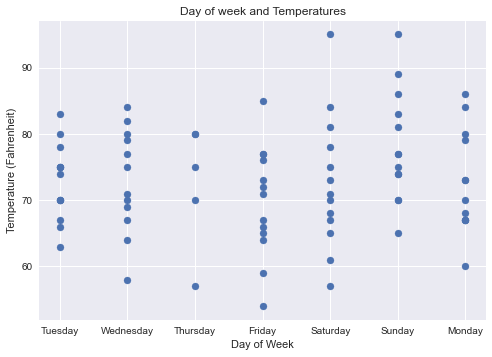

In [29]:
## Set up scatter plot to show correlation between day of week and temperatures

plt.style.use('seaborn')

x = dodgers_df['day_of_week']
y = dodgers_df['temp']

plt.title('Day of week and Temperatures')
plt.xlabel('Day of Week')
plt.ylabel('Temperature (Fahrenheit)')
plt.scatter(x,y)

## No clear indication that a specific day of the week has nicer or more preferred temperatures

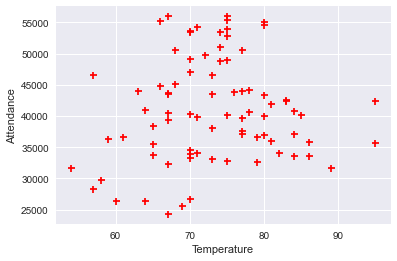

In [56]:
## Set up linear regression model for attendance and day of week

%matplotlib inline
plt.xlabel('Temperature')
plt.ylabel('Attendance')
plt.scatter(dodgers_df.temp, dodgers_df.attend, color = 'red' , marker = '+')

In [142]:
temp = dodgers_df.temp
attend = dodgers_df.attend

In [143]:
## fit linear regression model
## had to reshape
reg = linear_model.LinearRegression()
reg.fit(temp.values.reshape(-1, 1), attend)

LinearRegression()

In [144]:
## view coefficient
reg.coef_

array([98.71542724])

In [145]:
## view intercept
reg.intercept_

33819.22337777064

In [146]:
## negative score is still a score - I did a lot of research and it says the score can be pos or neg
## had to reshape 
reg.score(temp.values.reshape(-1, 1), temp, attend)

-27059217.1857819

In [150]:
## predict attendance if temperature is 75 degrees
predict_df = pd.read_csv("dodgers.csv")
predict_df.head(10)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


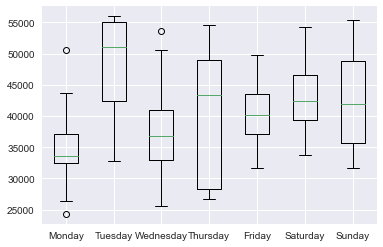

In [152]:
## setting up box plot for the predictive model - this is not a very conclusive model because many more
## scenarios would need to be ran but this is just the first run of that model
Monday = predict_df.loc[predict_df['day_of_week']=='Monday', 'attend'].values
Tuesday = predict_df.loc[predict_df['day_of_week']=='Tuesday', 'attend'].values
Wednesday = predict_df.loc[predict_df['day_of_week']=='Wednesday', 'attend'].values
Thursday = predict_df.loc[predict_df['day_of_week']=='Thursday', 'attend'].values
Friday = predict_df.loc[predict_df['day_of_week']=='Friday', 'attend'].values
Saturday = predict_df.loc[predict_df['day_of_week']=='Saturday', 'attend'].values
Sunday = predict_df.loc[predict_df['day_of_week']=='Sunday', 'attend'].values

plt.boxplot([Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday], labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);